# Chap4

## Bias-Variance trade off

(30,) (30,)


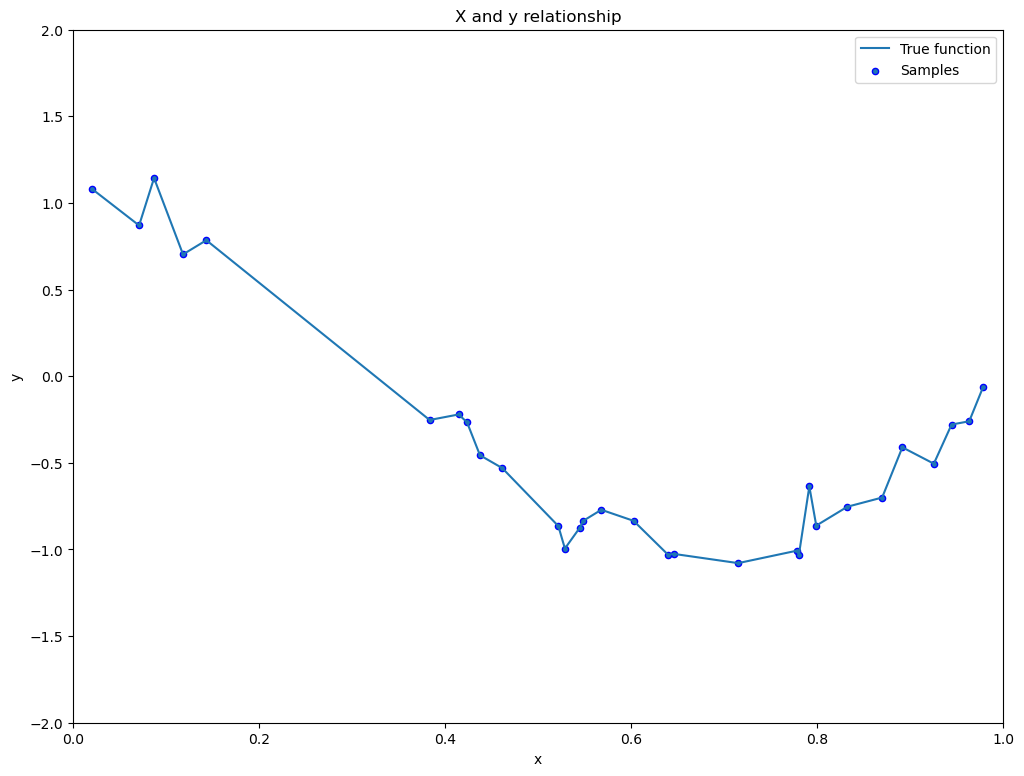

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_train_samples, n_test_samples = 30, 10

X_train = np.sort(np.random.rand(n_train_samples))
y_train = true_fun(X_train) + np.random.randn(n_train_samples) * 0.1

print(X_train.shape, y_train.shape)

def plot(X, y, figure=(12, 9)):
  plt.figure(figsize=figure)
  plt.plot(X, y, label='True function')
  plt.scatter(X, y, edgecolor='b', s=20, label='Samples')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.xlim((0, 1))
  plt.ylim((-2, 2))
  plt.legend(loc='best')
  plt.title('X and y relationship')
  
plot(X_train, y_train)

## Mô hình hồi quy đa thức

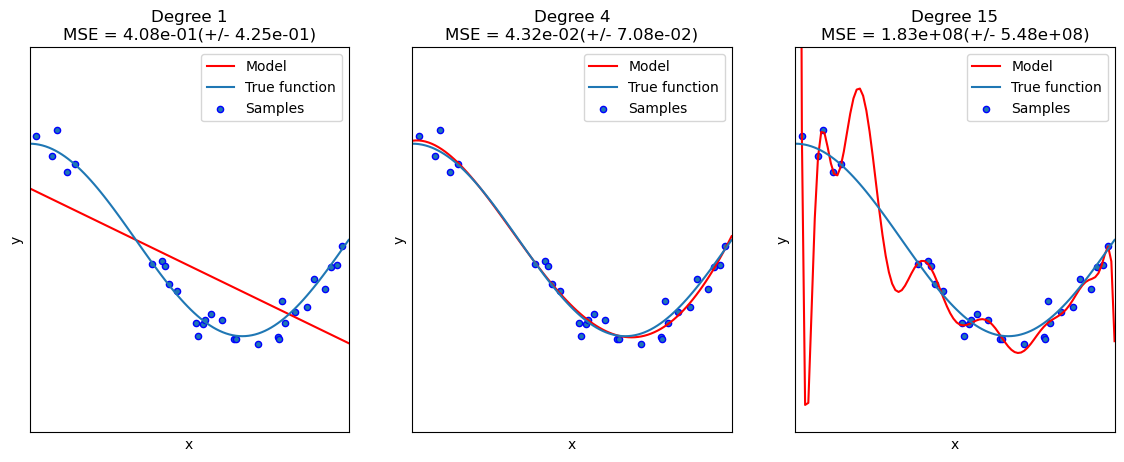

In [60]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    # Tạo các Featuer bậc degrees[i] cho mô hình.
    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    # Hồi qui tuyến tính
    linear_regression = LinearRegression()
    
    # Pipeline đơn giản cho mô hình từ feature engineering tới hồi qui tuyến tính
    pipeline = Pipeline([('polynomial_features', polynomial_features),
                         ('linear_regression', linear_regression)])
    
    # Huấn luyện mô hình
    pipeline.fit(X_train.reshape(-1,1), y_train)

    # Đánh giá mô hình sử dụng cross validation
    scores = cross_val_score(pipeline, X_train[:, np.newaxis], y_train,
                             scoring='neg_mean_squared_error', cv=10)

    # Dự báo trên tập huấn luyện
    X_test = np.linspace(0, 1, 100)
    y_test_pred = pipeline.predict(X_test[:, np.newaxis])

    # Vẽ biểu đồ trên tập huấn luyện
    ax.plot(X_test, y_test_pred, color='r', label='Model')
    ax.plot(X_test, true_fun(X_test), label='True function')
    ax.scatter(X_train, y_train, edgecolor='b', s=20, label='Samples')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc='best')
    
    plt.title('Degree {}\nMSE = {:.2e}(+/- {:.2e})'.format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

In [136]:
polynomial_features = PolynomialFeatures(degree=2,
                                             include_bias=False, interaction_only=False)

In [138]:
X_train.reshape(-1,1)

array([[0.68776921],
       [0.27347452],
       [0.73647317],
       ...,
       [0.8445494 ],
       [0.31910047],
       [0.82891547]])

In [140]:
transformed = polynomial_features.fit_transform(X_train.reshape(-1,1))
transformed

array([[0.68776921, 0.47302648],
       [0.27347452, 0.07478831],
       [0.73647317, 0.54239274],
       ...,
       [0.8445494 , 0.71326369],
       [0.31910047, 0.10182511],
       [0.82891547, 0.68710086]])